# 2장  단순선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

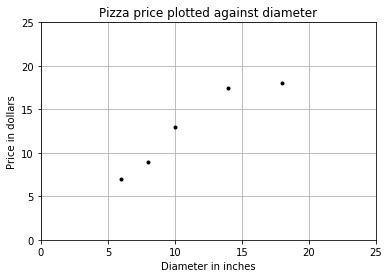

In [15]:
# 대문자는 행렬을 의미하고, 소문자는 벡터를 의미한다.

# X는 훈련 데이터의 특징이고, 여기서는 피자의 지름에 해당한다.
# scikit-learn은 특징 벡터 이름을 X로 사용한다. 
X = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)

# y는 피자의 가격을 나타내는 벡터이다.
y = [7, 9, 13, 17.5, 18]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')

# k. 인자를 넣지 않을 경우 점 그래프가 아닌 점을 선으로 이은 그래프를 그리게 된다.
plt.plot(X, y, 'k.')

plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [5]:
# 선형회귀분석 예측기를 생성한다.
model = LinearRegression()

# 훈련 데이터로 모델을 훈련시킨다.
model.fit(X, y)

# 새로운 데이터(피자의 지름)를 입력함으로써 피자의 지름으로부터의 가격을 예측한다.
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]
print('A 12" pizza should cost: $%.2f' % predicted_price)

A 12" pizza should cost: $13.68


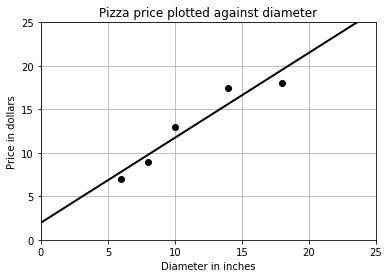

In [6]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')

# k.은 작은 점을, ko는 큰 점을 찍는다.
plt.plot(X, y, 'ko')

plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot([0, 25], [1.97, 26.37], color='k', linestyle='-', linewidth=2)
plt.show()

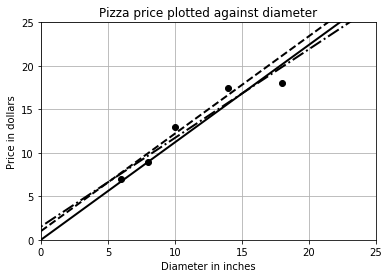

In [7]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'ko')
plt.axis([0, 25, 0, 25])
plt.grid(True)

plt.plot([0, 25], [0, 28], color='k', linestyle='-', linewidth=2)
plt.plot([0, 25], [1, 29], color='k', linestyle='--', linewidth=2)
plt.plot([-1, 25], [0.5, 27], color='k', linestyle='-.', linewidth=2)

plt.show()

In [9]:
print('Residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))

Residual sum of squares: 1.75


In [10]:
X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
x_bar = X.mean()
print(x_bar)

# 표본 분산을 계산할 떄 훈련 인스턴스 개수로부터 1을 차감하는 것에 주목하자.
# 이 기법은 베셀 교정(Bessel's correction)이라 불린다.
# 표본으로부터 모집단의 분산을 추정할 때 편향을 줄여준다.
variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print(variance)

11.2
23.2


In [16]:
print(np.var(X, ddof=1))

23.2


In [12]:
# 앞에서는 Y를 나타내기 위해 리스트를 사용했다.
# 여기서는 ndarray를 사용한다. 표본 평균을 계산하는 메소드를 제공하기 떄문이다.
y = np.array([7, 9, 13, 17.5, 18])
y_bar = y.mean()

# X는 이전에 reshape(-1,1) 구문으로 열벡터가 되었다.
# 공분산을 구하기 위해서는 두 벡터가 모두 행벡터가 되야 하므로 X를 전치(transpose)한다.
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum() / (X.shape[0] - 1)
print(covariance)
print(np.cov(X.transpose(), y)[0][1])

22.65
22.650000000000002


In [13]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = [7, 9, 13, 17.5, 18]

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = [11, 8.5, 15, 18, 11]

model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)
print(r_squared)

0.6620052929422553
